In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('survey.csv')

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
df=df[['Country','ConvertedComp','Employment','EdLevel','YearsCodePro']]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,Salary,Employment,EdLevel,YearsCodePro
0,Germany,NaN,"Independent contractor, freelancer, or self-em...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27
1,United Kingdom,NaN,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4
4,United States,NaN,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8


In [6]:
df=df[df['Salary'].notnull()]
df.head()

,Country,Salary,Employment,EdLevel,YearsCodePro
7,United States,116000.0,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13
9,United Kingdom,32315.0,Employed full-time,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4
10,United Kingdom,40070.0,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2
11,Spain,14268.0,Employed full-time,Some college/university study without earning ...,7
12,Netherlands,38916.0,Employed full-time,"Secondary school (e.g. American high school, G...",20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   Salary        34756 non-null  float64
 2   Employment    34717 non-null  object 
 3   EdLevel       34188 non-null  object 
 4   YearsCodePro  34621 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [8]:
df=df.dropna()
df.isnull().sum()

Country         0
Salary          0
Employment      0
EdLevel         0
YearsCodePro    0
dtype: int64

In [9]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   Salary        30019 non-null  float64
 2   EdLevel       30019 non-null  object 
 3   YearsCodePro  30019 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [10]:
df['Country'].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [11]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map
    

In [12]:
country_map=shorten_categories(df.Country.value_counts(),400)
df['Country']=df['Country'].map(country_map)
df.Country.value_counts()


Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   Salary        30019 non-null  float64
 2   EdLevel       30019 non-null  object 
 3   YearsCodePro  30019 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [14]:
df.head(5)

,Country,Salary,EdLevel,YearsCodePro
7,United States,116000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13
9,United Kingdom,32315.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4
10,United Kingdom,40070.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2
11,Spain,14268.0,Some college/university study without earning ...,7
12,Netherlands,38916.0,"Secondary school (e.g. American high school, G...",20


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   Salary        30019 non-null  float64
 2   EdLevel       30019 non-null  object 
 3   YearsCodePro  30019 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


AttributeError: 'Text' object has no property 'rotaion'

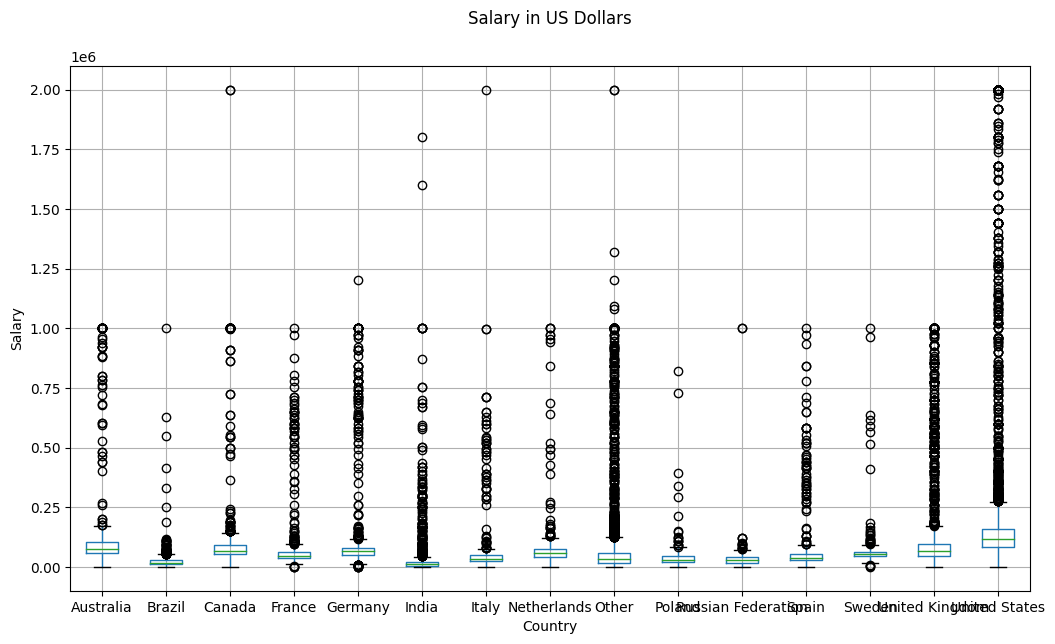

In [21]:
fig, ax =plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary in US Dollars')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotaion=90)
plt.show()

In [22]:
df=df[df['Salary']<= 250000]
df=df[df['Salary']>= 10000]
df=df[df['Country'] != 'Other']

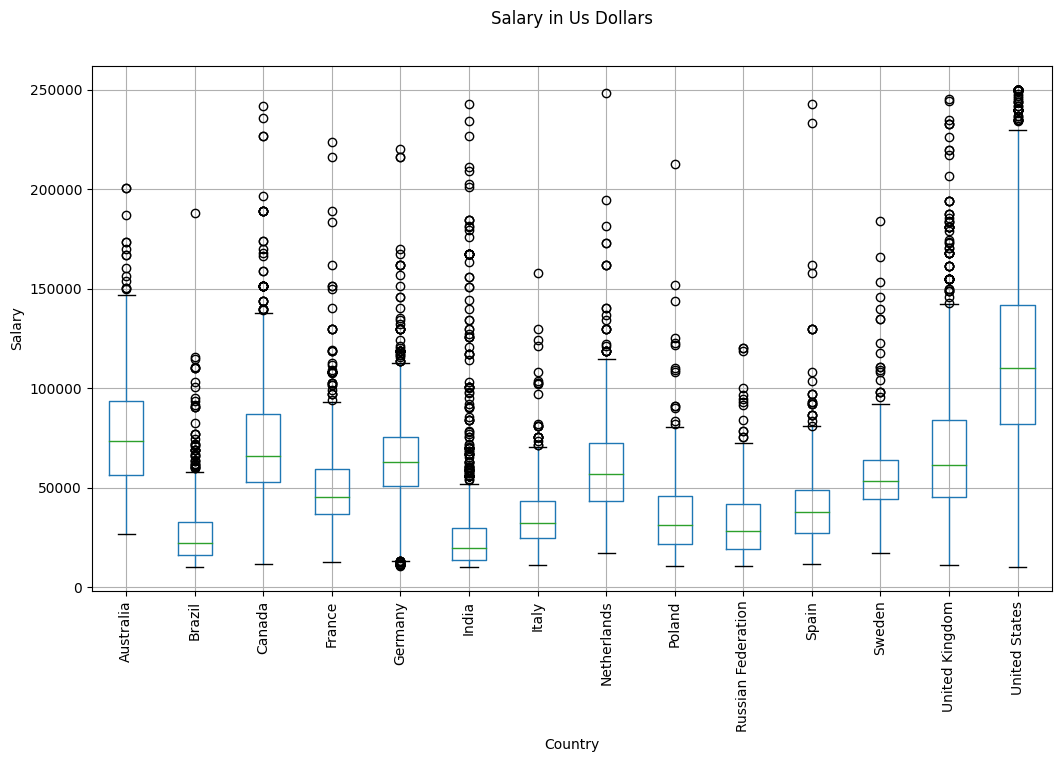

In [23]:
fig,ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary in Us Dollars')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [24]:
df['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [27]:
def clean_experience(x):
    if x== 'More than 50 years':
        return 50
    if x== 'Less than 1 year':
        return 0.5
    return float(x)
df['YearsCodePro']=df['YearsCodePro'].apply(clean_experience)

In [28]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [29]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree'in x or 'Other doctoral degree' in x:
        return 'Post Grad'
    return 'Less than Bachelors Degree'

df['EdLevel']=df['EdLevel'].apply(clean_education)
   

In [30]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree',
       'Less than Bachelors Degree', 'Post Grad'], dtype=object)

In [32]:
#need to label encode the data to start the machine learning process
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()


array([0, 2, 1, 3])

In [35]:
le_country = LabelEncoder()
df['Country']= le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [36]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [39]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [40]:
y_pred = linear_reg.predict(X)

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np
error = np.sqrt(mean_squared_error(y,y_pred))

In [42]:
error

39274.75368318509

In [49]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [51]:
DecisionTreeRegressor(random_state=0)

DecisionTreeRegressor(random_state=0)

In [50]:
y_pred = dec_tree_reg.predict(X)

In [57]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$29,414.94


In [60]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg=RandomForestRegressor(random_state=0)
random_forest_reg.fit(X,y.values)


RandomForestRegressor(random_state=0)

In [62]:
y_pred = random_forest_reg.predict(X)

In [64]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$29,487.31


In [66]:
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2,4,6,8,10,12]
parameters = {'max_depth':max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error')
gs.fit(X,y.values)




GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [67]:
regressor = gs.best_estimator_
regressor.fit(X,y.values)
y_pred = regressor.predict(X)
error= np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))



$30,428.51


In [68]:
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
...,...,...,...
64113,13,1,15.0
64116,13,0,6.0
64122,13,1,4.0
64127,13,3,12.0
